<a href="https://colab.research.google.com/github/ishashende/dict-and-strings/blob/master/SLR_using_GDSciL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/My Drive/AttendanceMarksSA.csv')
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


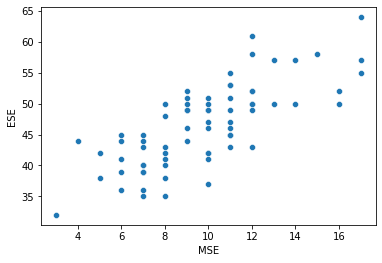

In [5]:
x= df['MSE']
Y= df['ESE']
sns.scatterplot(x,Y)

In [9]:
beta0=0
beta1=0
alpha=0.01
count =10000
n=float(len(x))

In [12]:
for i in range(count):
  Ybar = beta1*x + beta0
  beta1 = beta1 - (alpha/n)*sum(x*(Ybar-Y))
  beta0 = beta0 - (alpha/n)*sum(Ybar-Y)
  print(beta0,beta1)

Streaming output truncated to the last 5000 lines.
30.666283977266797 1.632158034587601
30.666284036576933 1.632158029048859
30.6662840958357 1.632158023514914
30.666284155043144 1.6321580179857618
30.66628421419931 1.6321580124613984
30.666284273304246 1.6321580069418191
30.66628433235799 1.6321580014270203
30.666284391360588 1.6321579959169978
30.666284450312087 1.6321579904117476
30.66628450921253 1.632157984911265
30.66628456806196 1.6321579794155463
30.666284626860424 1.6321579739245873
30.666284685607963 1.632157968438384
30.666284744304622 1.632157962956932
30.666284802950447 1.6321579574802274
30.666284861545478 1.6321579520082659
30.666284920089762 1.6321579465410438
30.66628497858334 1.6321579410785565
30.666285037026263 1.6321579356208005
30.66628509541857 1.6321579301677707
30.666285153760303 1.632157924719464
30.66628521205151 1.6321579192758755
30.66628527029223 1.632157913837002
30.666285328482513 1.6321579084028386
30.666285386622395 1.6321579029733817
30.66628544471192

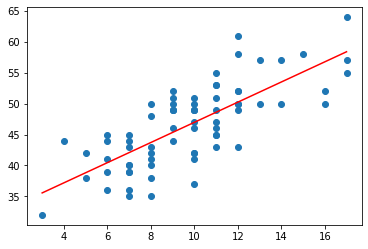

In [14]:
Ybar = beta1*x + beta0
plt.scatter(x,Y)
plt.plot([min(x),max(x)], [min(Ybar),
max(Ybar)], color='red')
plt.show()

In [16]:
import math
def RSE(Y_true, Y_predicted):
  Y_true = np.array(Y_true)
  Y_predicted = np.array(Y_predicted)
  RSS = np.sum(np.square(Y_true - Y_predicted))
  rse = math.sqrt(RSS / (len(Y_true)-2))
  return rse 
rse= RSE(df['ESE'],Ybar)
print(rse)

4.396224549647795


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
x = np.array(df['MSE']).reshape(-1,1)
Y = np.array(df['ESE']).reshape(-1,1)

lr = LinearRegression()
lr.fit(x,Y)

print(lr.coef_)
print(lr.intercept_)

Yp = lr.predict(x)
rse = RSE(Y,Yp)

print(rse)

[[1.63215164]]
[30.66635246]
4.396224549647786
